In [419]:
import copy

In [420]:
class Vertice:
    def __init__(self,idv,q):
        self.id=idv
        self.q=q
        self.degree=0

V1=[]
V1.append(Vertice(idv=1,q=['a','b','c']))
V1.append(Vertice(idv=2,q=['a','b','d']))
V1.append(Vertice(idv=3,q=['a','b','c']))

V2=[]
V2.append(Vertice(idv=1,q=['w','x','y']))
V2.append(Vertice(idv=2,q=['w','x','z']))
V2.append(Vertice(idv=3,q=['w','x','y']))

V=[V1,V2]

In [421]:
class Edge:
    def __init__(self, V1Id:int, V2Id:int):
        self.V1Id = V1Id
        self.V2Id = V2Id
        
edges=[]
edges.append(Edge(1,1))
edges.append(Edge(1,2))
edges.append(Edge(1,3))
edges.append(Edge(2,1))
edges.append(Edge(2,2))
edges.append(Edge(2,3))
edges.append(Edge(3,3))

print(edges[0].V1Id)

1


In [422]:
liste=[[1,2,3,4,None,5,None],[4,None,3]]
liste=list(filter(None,liste))
print(liste)

[[1, 2, 3, 4, None, 5, None], [4, None, 3]]


In [428]:
from abc import ABC, abstractmethod
import numpy as np
import copy

class Graph_bi:
    def __init__(self, V:list, I:list, edges:list):
        self.V=V #set of Vetices 
        self.I=I #set of labels constituing patterns
        self.edges=edges
        self.q=[]
        self.setCorePattern()
        self.setDegrees()
        
    def setCorePattern(self):
        '''Calculate the core bi-pattern, i.e. the more specific patttern that occurs in the nodes.
        '''
        q1=self.I[0]
        q2=self.I[1]
        for v in self.V[0]:
            q1=[value for value in q1 if value in v.q]
        for v in self.V[1]:
            q2=[value for value in q2 if value in v.q]
        q=[q1,q2]
        self.q=q
        pass
    
    def setDegrees(self):
        '''Set the degree of each vertice, i.e. the number of connexion to the other vertices it has.
        '''
        for i in self.V:
            for v in i:
                v.degree = 0
                
        for v in self.V[0]:
            for e in self.edges:
                if v.id == e.V1Id:
                    v.degree +=1
                    
        for v in self.V[1]:
            for e in self.edges:
                if v.id == e.V2Id:
                    v.degree +=1
                            
        pass
        
    def interior(self,h:int,a:int):
        '''Calculate the h-a BHA-core of the graphe. It remove the vertices from V1 (resp. V2) if its degree is less 
                than h (resp. a).
        '''
        self.setDegrees()
        edges=[]
        V1=[]
        V2=[]
        for v in self.V[0]:
            if v.degree >= h:
                for e in self.edges:
                    if v.id == e.V1Id:
                        edges.append(e)
                V1.append(v)        
        self.edges=edges
        edges=[]
        for v in self.V[1]:
            if v.degree >= a:
                for e in self.edges:
                    if v.id == e.V2Id:
                        edges.append(e)
                V2.append(v)
                
        self.edges=edges
        self.V=[V1,V2]
        self.setDegrees()
        self.setCorePattern()
               
        pass
    
    def extension(self,q):
        '''Calculate the support of q, i.e. the nodes which pattern contains q
        '''
        S1=[]
        S2=[]
        edges=[]
        for v in self.V[0]:
            if ([value for value in q[0] if value in v.q]==q[0]):
                S1.append(v)
                for e in self.edges:
                    if v.id == e.V1Id:
                        edges.append(e)
        edges2=[]
        for v in self.V[1]:
            if ([value for value in q[1] if value in v.q]==q[1]):
                S2.append(v)
                for e in edges:
                    if v.id == e.V2Id:
                        edges2.append(e)
            
        S=[S1,S2]
        self.V=S
        self.edges=edges2
        self.setCorePattern()
        self.setDegrees()
        pass
    
    def minus(self,q:list):
        "Return the set of item from the alphabet I which is not in the pattern q"
        minus=[value for value in self.I[0]+self.I[1] if (value not in q[0]) & (value not in q[1])]
        return minus
    
    def add(self,q:list,x):
        "Return the pattern q with x added in the right place"
        q_new=copy.deepcopy(q)
        if x in self.I[0]:
            q_new[0] += [x]
        else:
            q_new[1] += [x]
            
        return q_new
    
    def Enumerate(self,EL:list,s:int,h:int,a:int):
        #self.Output()
        for x in self.minus(self.q):
            p=self.add(self.q,x)
            self.extension(p)
            self.interior(h,a)
            if (len(self.V[0])>=s)&(len(self.V[1])>=s):
                self.setCorePattern()
                if x not in EL:
                    EL.append(x)
                    self.Enumerate(EL=EL,s=s,h=h,a=a)
                    
    def toStringPattern(self,q):
        string=''
        for i in q:
            string+=i
        return string

    def Output(self):
        #s=toStringPattern(self.q)
        print('Core pattern: ',self.q)
        for s in self.V[0]:
            print('V1 node: ',s.id)
        for s in self.V[1]:
            print('V2 node: ',s.id)
        G1 = nwx.Graph()
        nodelist=[]
        labels={}
        ids={}
        idx=0
        for v in self.V[0]:
            ids[str(v.id)+'V1']=idx
            G1.add_node(idx,bipartite=0)
            nodelist.append(idx)
            string=''
            for i in v.q:
                string+=str(i)
            labels[idx]=string
            idx+=1

        for v in self.V[1]:
            ids[str(v.id)+'V2']=idx
            G1.add_node(idx,bipartite=1)
            nodelist.append(idx)
            string=''
            for i in v.q:
                string+=str(i)
            labels[idx]=string
            idx+=1

        for e in self.edges:
            G1.add_edge(ids[str(e.V1Id)+'V1'],ids[str(e.V2Id)+'V2'])
    
        top = nwx.bipartite.sets(G1)[0]
        pos = nwx.bipartite_layout(G1,top)
        nwx.draw_networkx_nodes(G1,pos,nodelist=nodelist[:len(self.V[0])],node_color='c')
        nwx.draw_networkx_nodes(G1,pos,nodelist=nodelist[len(self.V[0]):],node_color='y')
        nwx.draw_networkx_edges(G1,pos)
        nwx.draw_networkx_labels(G1, pos, labels, font_size=16)

        plt.show() 
            
             
    def getVerticeV1(self,idv:int):
        pass
    
    def getVerticeV2(self,idv:int):
        pass

In [429]:
I=[['a','b','c','d'],['w','x','y','z']]

In [433]:
G=Graph_bi(V=V,I=I,edges=edges)

In [434]:
print(G.q)

[['a', 'b'], ['w', 'x']]


In [416]:
for i in G.V:
    for v in i:
        print(v.id)
print(G.q)

1
2
3
1
2
3
[['a', 'b'], ['w', 'x']]


In [435]:
G.interior(2,2)
for i in G.V:
    for v in i:
        print('Noeud ',v.id)

for e in G.edges:
    print('Lien de ',e.V1Id,' à ',e.V2Id)
print(G.q)

Noeud  1
Noeud  2
Noeud  1
Noeud  2
Noeud  3
Lien de  1  à  1
Lien de  2  à  1
Lien de  1  à  2
Lien de  2  à  2
Lien de  1  à  3
Lien de  2  à  3
[['a', 'b'], ['w', 'x']]


In [171]:
test=[value for value in V if (value == None)]
print(G.V[0][2])

IndexError: list index out of range

In [216]:
G.minus(G.q)

['c', 'd', 'y', 'z']

In [436]:
p=G.add(G.q,'c')

In [437]:
print(p)

[['a', 'b', 'c'], ['w', 'x']]


In [438]:
G.extension(p)

Core pattern:  [['a', 'b', 'c'], ['w', 'x']]
V1 node:  1
V2 node:  1
V2 node:  2
V2 node:  3


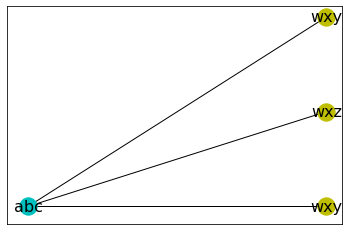

In [439]:
G.Output()

In [440]:
G.interior(2,2)

Core pattern:  [['a', 'b', 'c'], ['w', 'x', 'y', 'z']]
V1 node:  1


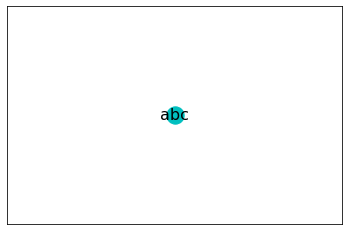

In [441]:
G.Output()

In [442]:
len(G.V[1])

0

In [343]:
q=G.add(p,'z')

In [344]:
print(q)
S2=G.extension(q)
for s in S2.V[1]:
    print(s.id)

[['a', 'b', 'c'], ['w', 'x', 'z']]
2


In [432]:
G.interior(2,2)
EL=[]
G.Enumerate(EL=EL,s=1,h=2,a=2)
print(EL)

[]


In [320]:
def test(l:list,i):
    if i>0:
        l.append(i)
        test(l,i-1)

l=[]
test(l,4)
print(l)

[4, 3, 2, 1]


In [372]:
print(G.q)

AttributeError: 'Graph' object has no attribute 'q'

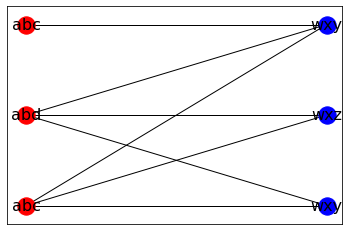

In [410]:
import matplotlib.pyplot as plt
import networkx as nwx

def toString(q):
    string=''
    for i in q:
        string+=i
    return string

G1 = nwx.Graph()
nodelist=[]
labels={}
for v in G.V[0]:
    G1.add_node(v.id,bipartite=0)
    nodelist.append(v.id)
    labels[v.id]=toString(v.q)

for v in G.V[1]:
    G1.add_node(v.id+len(G.V[0]),bipartite=2)
    nodelist.append(v.id+len(G.V[0]))
    labels[v.id+len(G.V[0])]=toString(v.q)  

for e in G.edges:
    G1.add_edge(e.V1Id,e.V2Id+len(G.V[0]))
    
top = nwx.bipartite.sets(G1)[0]
pos = nwx.bipartite_layout(G1,top)
nwx.draw_networkx_nodes(G1,pos,nodelist=nodelist[:len(G.V[0])],node_color='r')
nwx.draw_networkx_nodes(G1,pos,nodelist=nodelist[len(G.V[0]):],node_color='b')
nwx.draw_networkx_edges(G1,pos)
nwx.draw_networkx_labels(G, pos, labels, font_size=16)
# dessin avec Mathplotlib

#nwx.draw(G1)  # on peut aussi essayer avec :
# nx.draw_random(G), nx.draw_circular(G), nx.draw_spectral(G)

plt.show()  # pour afficher ensuite
